In [3]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount ('/content/drive/')

Mounted at /content/drive/


**Import** **Dataset**

In [4]:
dataset = pd.read_csv('/content/drive/My Drive/Skripsi/pdfGaruda.csv', sep=";")

In [ ]:
dataset.head(79)

,Nama PDF,obj,endobj,stream,endstream,xref,trailer,startxref,/Page,/Encrypt,...,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/Colors>2^24,label
0,490083,87,87,34,34,1,1,1,12,0,...,0,0,0,0,0,0,0,0,0,Benign
1,490084,61,61,22,22,2,2,2,7,0,...,0,0,0,0,0,0,0,0,0,Benign
2,490085,57,57,17,17,2,2,2,5,0,...,0,0,0,0,0,0,0,0,0,Benign
3,490086,74,74,19,19,2,2,2,8,0,...,0,0,0,0,0,0,0,0,0,Benign
4,490087,61,61,17,17,2,2,2,5,0,...,0,0,0,0,0,0,0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,495639,59,59,27,27,1,1,1,6,0,...,0,0,0,0,0,0,0,0,0,Benign
75,491834,42,42,12,12,2,2,2,5,0,...,0,0,0,0,0,0,0,0,0,Benign
76,693966.pdf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mal-html
77,490330,45,45,35,35,0,0,2,8,0,...,0,0,0,0,0,0,0,0,0,Benign


**Preproccessing**

In [ ]:
dataset['label'] = dataset.label.map({'Benign':0, 'mal-html':1, 'mal-pdf':2})

In [ ]:
dataset.head(79)

,Nama PDF,obj,endobj,stream,endstream,xref,trailer,startxref,/Page,/Encrypt,...,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/Colors>2^24,label
0,490083,87,87,34,34,1,1,1,12,0,...,0,0,0,0,0,0,0,0,0,0
1,490084,61,61,22,22,2,2,2,7,0,...,0,0,0,0,0,0,0,0,0,0
2,490085,57,57,17,17,2,2,2,5,0,...,0,0,0,0,0,0,0,0,0,0
3,490086,74,74,19,19,2,2,2,8,0,...,0,0,0,0,0,0,0,0,0,0
4,490087,61,61,17,17,2,2,2,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,495639,59,59,27,27,1,1,1,6,0,...,0,0,0,0,0,0,0,0,0,0
75,491834,42,42,12,12,2,2,2,5,0,...,0,0,0,0,0,0,0,0,0,0
76,693966.pdf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
77,490330,45,45,35,35,0,0,2,8,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = dataset['label']
X = dataset.drop(['Nama PDF','label'], axis =1)

In [ ]:
X.head(79)

,obj,endobj,stream,endstream,xref,trailer,startxref,/Page,/Encrypt,/ObjStm,...,/JavaScript,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/Colors>2^24
0,87,87,34,34,1,1,1,12,0,0,...,0,0,0,0,0,0,0,0,0,0
1,61,61,22,22,2,2,2,7,0,1,...,0,0,0,0,0,0,0,0,0,0
2,57,57,17,17,2,2,2,5,0,1,...,0,0,0,0,0,0,0,0,0,0
3,74,74,19,19,2,2,2,8,0,1,...,0,0,0,0,0,0,0,0,0,0
4,61,61,17,17,2,2,2,5,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,59,59,27,27,1,1,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0
75,42,42,12,12,2,2,2,5,0,1,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,45,45,35,35,0,0,2,8,0,11,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head(2503)

0       0
1       0
2       0
3       0
4       0
       ..
2498    2
2499    0
2500    0
2501    0
2502    0
Name: label, Length: 2503, dtype: int64

0    9800
1     194
2       6
Name: label, dtype: int64


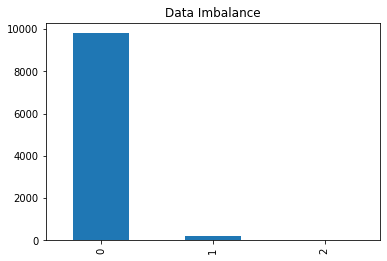

In [ ]:
target = 'label'
c = pd.DataFrame(data=y,columns=["label"])
c.label.value_counts().plot(kind='bar', title='Data Imbalance');
print(dataset[target].value_counts())

**SMOTE**
(**Random** **Over** **Sampler**)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_mm =mm.fit_transform(X)

In [ ]:
OverSampler = RandomOverSampler(random_state=0, sampling_strategy='auto')
X_resample, y_resample = OverSampler.fit_resample(X,y)

In [ ]:
X_mm

array([[0.01720047, 0.01720728, 0.00688817, ..., 0.        , 0.        ,
        0.        ],
       [0.0120601 , 0.01206487, 0.00445705, ..., 0.        , 0.        ,
        0.        ],
       [0.01126928, 0.01127373, 0.00344408, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00988533, 0.00988924, 0.00263371, ..., 0.        , 0.        ,
        0.        ],
       [0.0179913 , 0.01799842, 0.00506483, ..., 0.        , 0.        ,
        0.        ],
       [0.01621194, 0.01621835, 0.00567261, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
conv = pd.DataFrame(X_mm,columns=  ['obj','endobj',	'stream',	'endstream',	'xref',	'trailer',	'startxref','/Page', '/Encrypt', '/ObjStm', '/JS', '/JavaScript',
                '/AA', '/OpenAction', '/AcroForm', '/JBIG2Decode', '/RichMedia',
                '/Launch', '/EmbeddedFile', '/XFA', '/Colors>2^24'])
conv

,obj,endobj,stream,endstream,xref,trailer,startxref,/Page,/Encrypt,/ObjStm,...,/JavaScript,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/Colors>2^24
0,0.017200,0.017207,0.006888,0.006888,0.011364,0.111111,0.052632,0.061856,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.012060,0.012065,0.004457,0.004457,0.022727,0.222222,0.105263,0.036082,0.0,0.00578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.011269,0.011274,0.003444,0.003444,0.022727,0.222222,0.105263,0.025773,0.0,0.00578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.014630,0.014636,0.003849,0.003849,0.022727,0.222222,0.105263,0.041237,0.0,0.00578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.012060,0.012065,0.003444,0.003444,0.022727,0.222222,0.105263,0.025773,0.0,0.00578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.028667,0.028679,0.010940,0.010940,0.011364,0.111111,0.052632,0.072165,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.012060,0.012065,0.003849,0.003849,0.011364,0.111111,0.052632,0.036082,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.009885,0.009889,0.002634,0.002634,0.022727,0.222222,0.105263,0.030928,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.017991,0.017998,0.005065,0.005065,0.011364,0.111111,0.052632,0.067010,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Import Library SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X_mm, y)

label
0        9800
1        9800
2        9800
dtype: int64


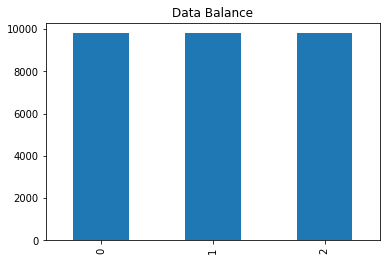

In [ ]:
c = pd.DataFrame(data=y_smote,columns=["label"])
c.label.value_counts().plot(kind='bar', title='Data Balance');
print (c.value_counts())

In [ ]:
X_smote

array([[0.01720047, 0.01720728, 0.00688817, ..., 0.        , 0.        ,
        0.        ],
       [0.0120601 , 0.01206487, 0.00445705, ..., 0.        , 0.        ,
        0.        ],
       [0.01126928, 0.01127373, 0.00344408, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0183329 , 0.01834015, 0.00706798, ..., 0.        , 0.        ,
        0.        ],
       [0.01803182, 0.01803896, 0.0069378 , ..., 0.        , 0.        ,
        0.        ],
       [0.08253584, 0.08256849, 0.00522313, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y_smote

0        0
1        0
2        0
3        0
4        0
        ..
29395    2
29396    2
29397    2
29398    2
29399    2
Name: label, Length: 29400, dtype: int64

In [ ]:
target ='label'
tar = ['2','1','0']
feat = ['obj','endobj',	'stream',	'endstream',	'xref',	'trailer',	'startxref','/Page', '/Encrypt', '/ObjStm', '/JS', '/JavaScript',
                '/AA', '/OpenAction', '/AcroForm', '/JBIG2Decode', '/RichMedia',
                '/Launch', '/EmbeddedFile', '/XFA', '/Colors>2^24']
tar

['2', '1', '0']

In [ ]:
feat

['obj',
 'endobj',
 'stream',
 'endstream',
 'xref',
 'trailer',
 'startxref',
 '/Page',
 '/Encrypt',
 '/ObjStm',
 '/JS',
 '/JavaScript',
 '/AA',
 '/OpenAction',
 '/AcroForm',
 '/JBIG2Decode',
 '/RichMedia',
 '/Launch',
 '/EmbeddedFile',
 '/XFA',
 '/Colors>2^24']

**Parameter use GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

parameters = {
        'max_depth' : [1,2,3,4,5,7,8,9,10],
        'criterion' : ["gini", "entropy"],
        'min_samples_leaf': [1,2,3,4,5],
        'min_samples_split': [2,3,4,5]
}

In [ ]:
search = GridSearchCV(model,
                      parameters,
                      cv = 5,
                      verbose = 3
                      )
search.fit(X_smote, y_smote)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.666 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.667 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.667 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.667 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.667 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3;, score=0.666 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3;, score=0.667 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3;, score=0.667 total time=   0.0s
[CV 4/5] END cri

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=3)

In [ ]:
search.best_score_, search.best_params_

(0.9853741496598639,
 {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 3,
  'min_samples_split': 3})

**Stratified K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

skf = StratifiedKFold(n_splits=5)
score_skf = []
cm_skf = []

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion="gini",
                            max_depth=10,
                            min_samples_leaf=3,
                            min_samples_split=3
                            )


In [ ]:
i=1
for train_set, test_set in skf.split(X_smote, y_smote):
  tree.fit(X_smote[train_set], y_smote[train_set])
  sco = tree.score(X_smote[test_set], y_smote[test_set])
  score_skf.append(sco)
  y_pred=tree.predict(X_smote[test_set])
  cm=confusion_matrix(y_smote[test_set], y_pred)
  cm_skf.append(cm)
  print("iteration ", i)
  i +=1

iteration  1
iteration  2
iteration  3
iteration  4
iteration  5


In [ ]:
score_skf

[0.983843537414966,
 0.9795918367346939,
 0.9835034013605443,
 0.9695578231292517,
 0.9760204081632653]

In [ ]:
cm_skf

[array([[1870,    1,   89],
        [   0, 1960,    0],
        [   5,    0, 1955]]), array([[1841,    0,  119],
        [   0, 1960,    0],
        [   1,    0, 1959]]), array([[1863,    0,   97],
        [   0, 1960,    0],
        [   0,    0, 1960]]), array([[1782,    0,  178],
        [   0, 1960,    0],
        [   1,    0, 1959]]), array([[1821,    0,  139],
        [   0, 1960,    0],
        [   2,    0, 1958]])]

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree_pdfmalware.GV", 
                class_names=tar, feature_names=feat, 
                impurity=False, filled=True
                )

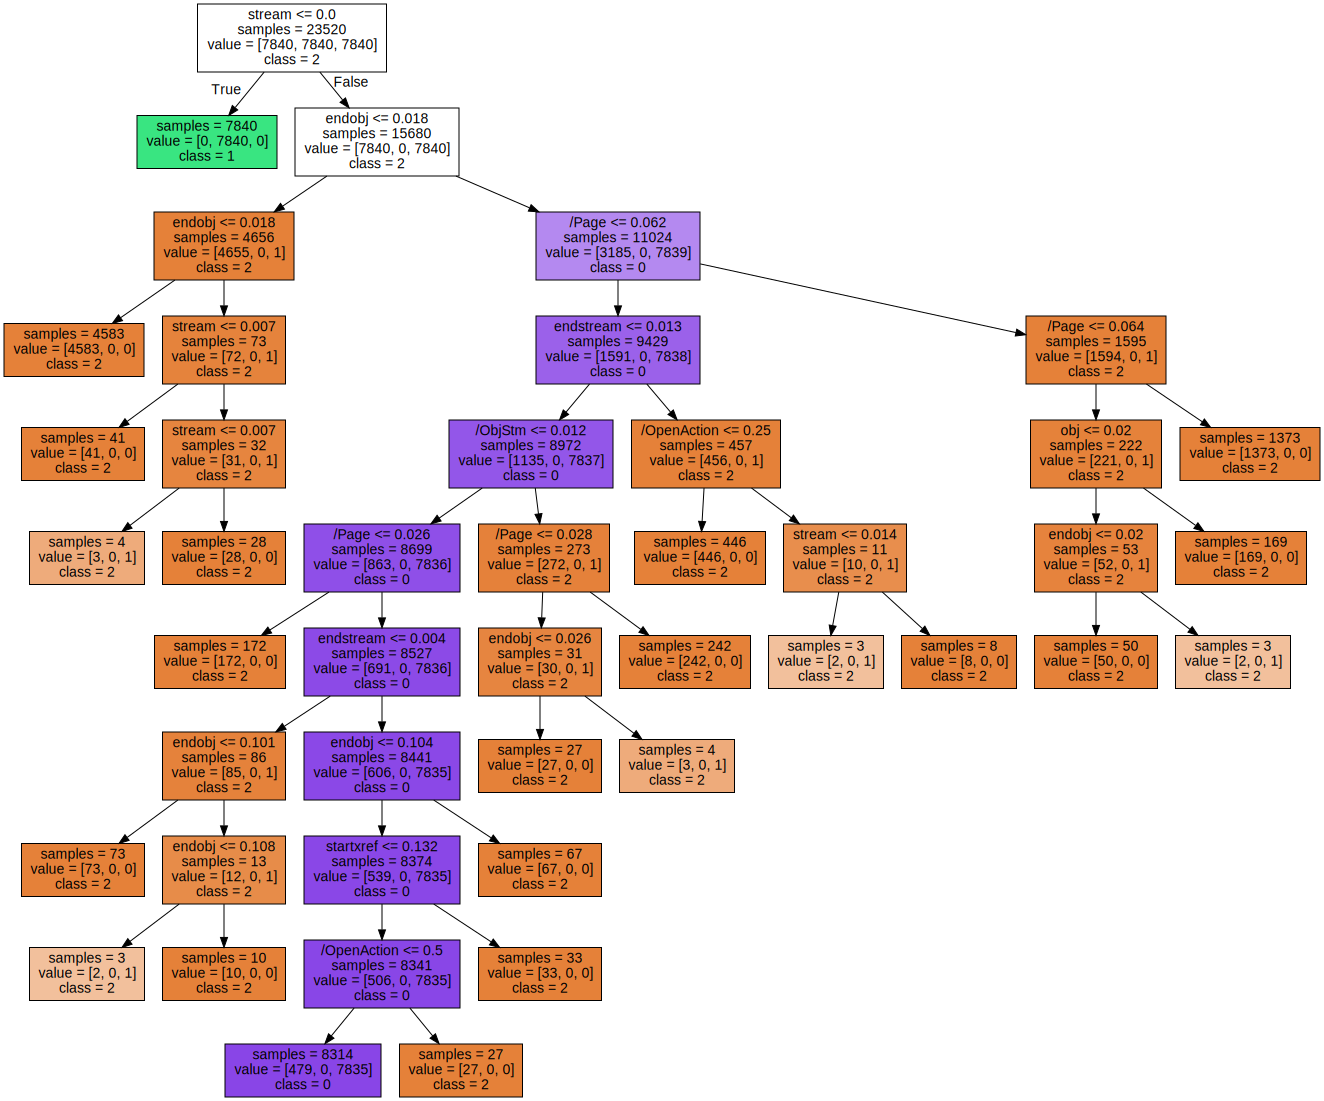

In [ ]:
import graphviz

with open("tree_pdfmalware.GV") as fig:
  dot_graph = fig.read()
graphviz.Source(dot_graph)